# Artificial intelligence (AI) in disease diagnosis

## Introduction
Artificial Intelligence has evolved a lot and is currently able to solve problems that are very complex and require human specialization. In the healthcare sector, in the field of disease diagnosis, AI through computer vision can be used to analyze medical images. Such medical images are such as X-rays, CT scans and MRIs where relevant information that can aid in the diagnosis of various diseases is extracted.

In this work we shall use X - ray images. In the health sector, X - ray images are used in the following ways but not limited to detection of lung problems: X-rays can be used to identify problems with the lungs such as pneumonia, lung cancer, or other conditions.

### Pneumonia

Pneumonia is an infection of the lungs that can cause inflammation and fluid accumulation in the air spaces of the lungs as can be seen in the image below:


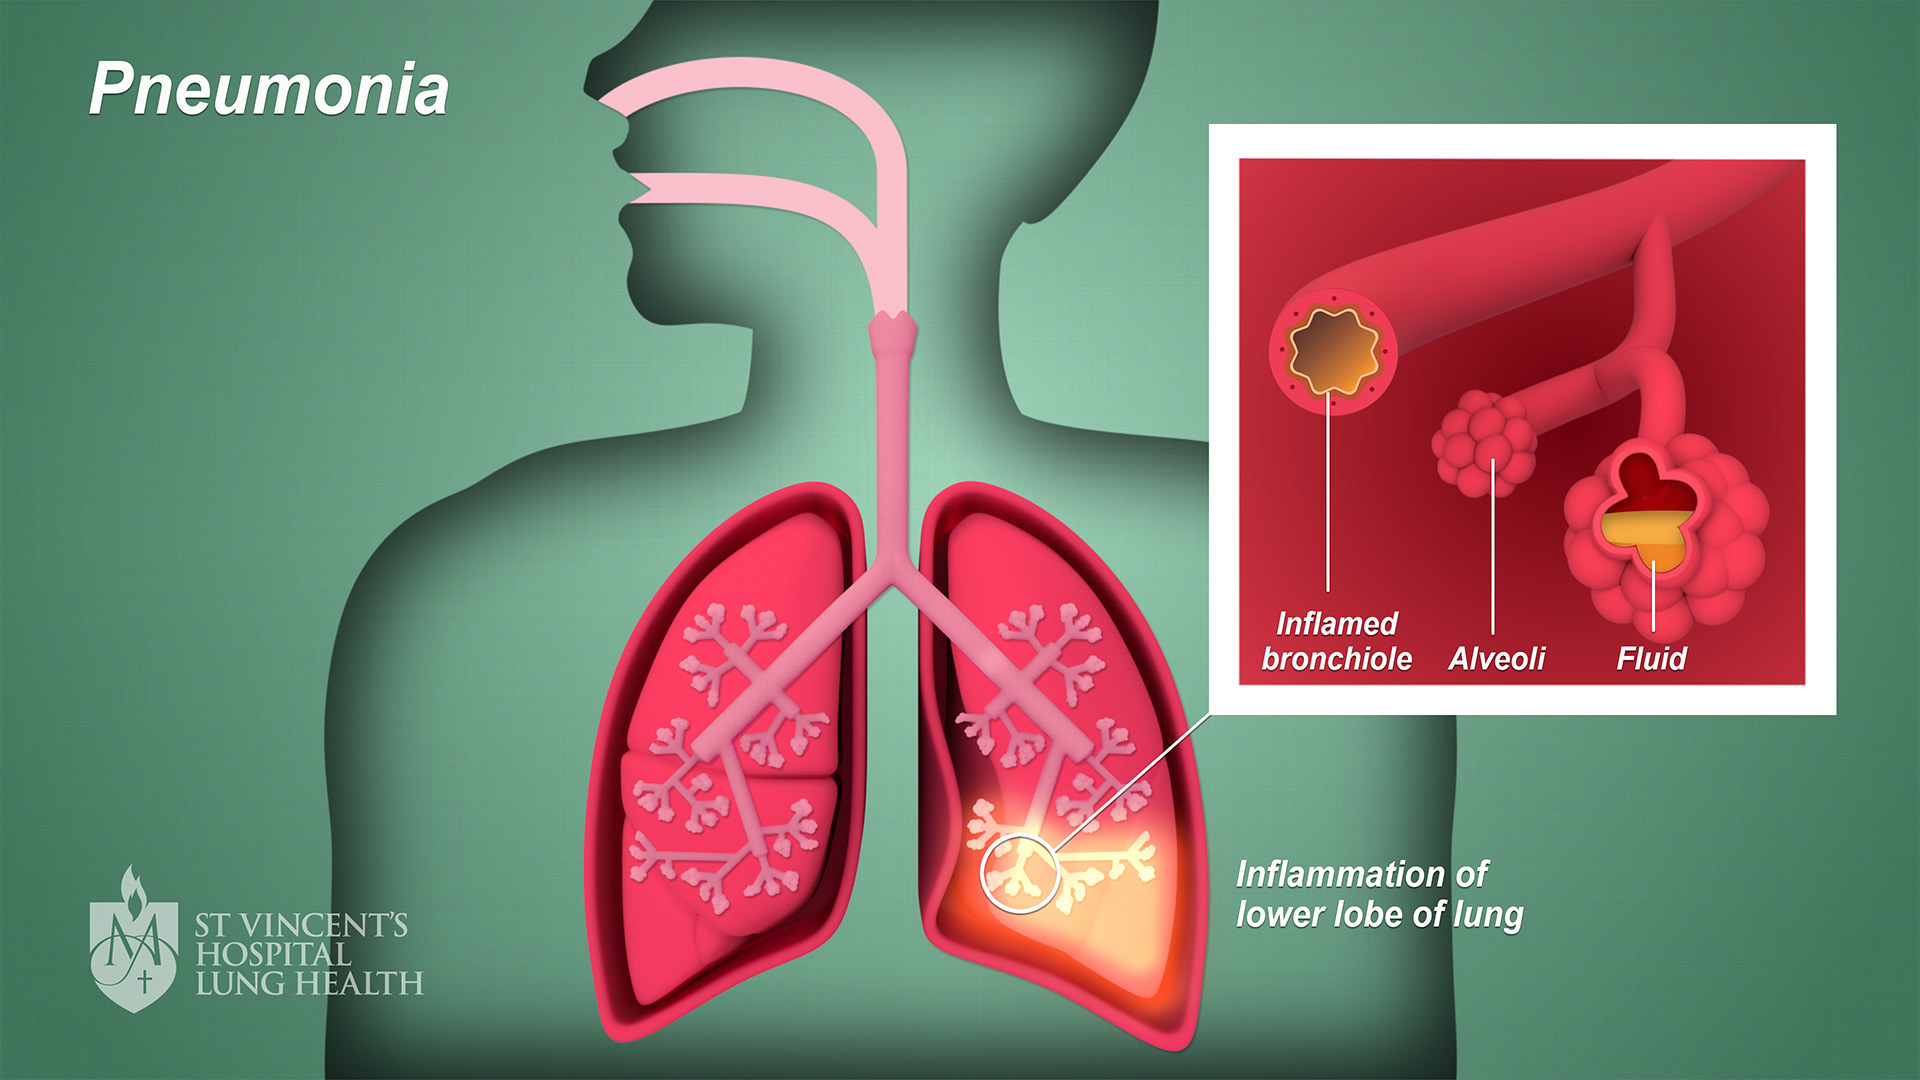


Pneumonia can be caused by a variety of microorganisms, including bacteria, viruses, and fungi. This infection can range in severity from mild to severe, and in some cases, it can be life-threatening.

The image above was obtained from this link: https://www.svhlunghealth.com.au/conditions/pneumonia

### Lung cancer

Lung cancer is a type of cancer that starts in the lungs. There are two main types of lung cancer: non-small cell lung cancer (NSCLC) and small cell lung cancer (SCLC). NSCLC is the most common type and tends to grow and spread more slowly than SCLC. These two types of lung cancer are shown in the images below:

***Non small cell lung cancer (NSCLC)***
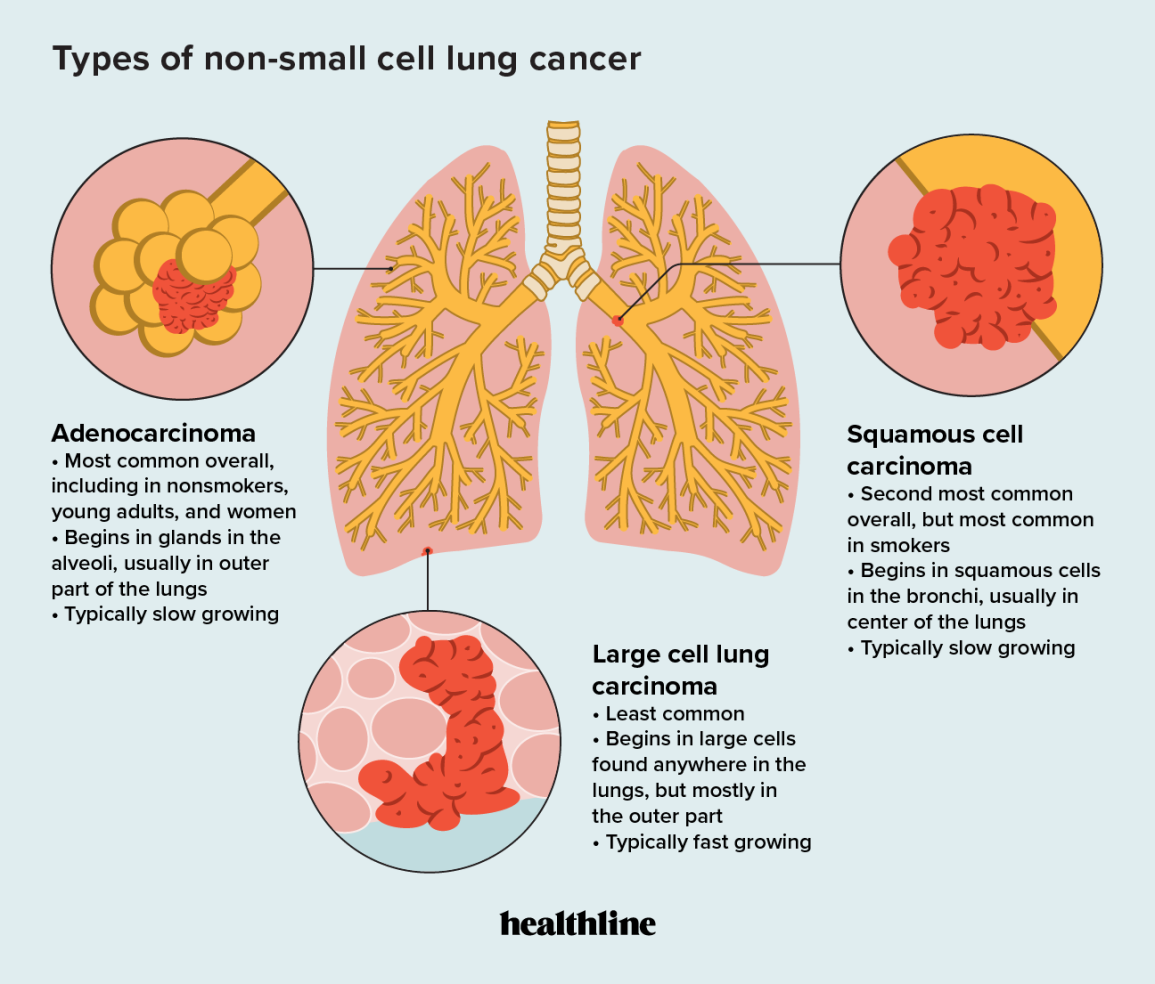
This image was obtained from this link: https://www.healthline.com/health/lung-cancer/types-of-non-small-cell-lung-cancer

As explained above, small cell lung cancer (SCLC) spreads faster than non-small cell lung cancer (NSCLC). It is is a more aggressive form of lung cancer that tends to spread more quickly to other parts of the body. The image below shows a case of SCLC.

***Small cell lung cancer (SCLC)***
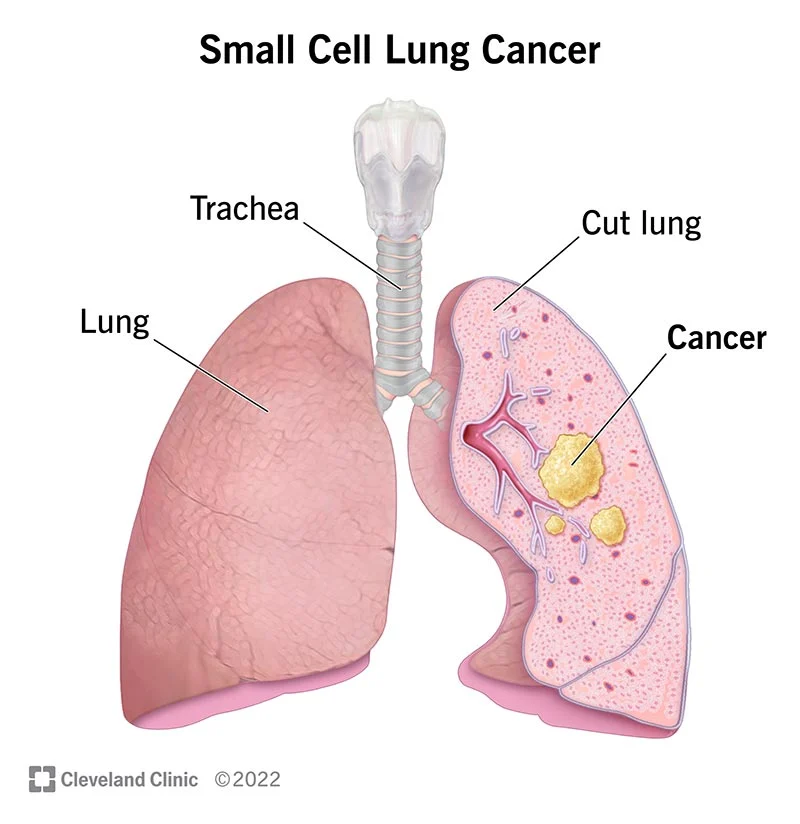
This image can be found on this link: https://my.clevelandclinic.org/health/diseases/6202-small-cell-lung-cancer

### Objective

- The objective of this work is to build a computer vision model using convolutional neural networt that can classify lung infection in a person using medical imagery.

### Questions

***What is Computer Vision?***

- Computer vision is a field of computer science that focuses on the development of algorithms and systems that can interpret and understand visual data from the world around us.
- This includes tasks such as image and video analysis, object recognition, and scene understanding.

***What is a convolutional neural network?***

- A convolutional neural network (CNN) is a type of artificial neural network designed specifically for processing data that has a grid-like structure, such as an image. CNNs are composed of multiple interconnected layers of artificial neurons, or "units," that process and transform the input data as it flows through the network.
- CNNs are composed of multiple interconnected layers of artificial neurons, or "units," that process and transform the input data as it flows through the network.

### Lung infection detection using CNN

Convolutional neural network (CNN) can used in the task of detecting lung infections in medical images. This is typically done using chest X-rays or CT scans as input data, and training the CNN to classify the images as either normal or infected. The neural networks filter an image before classifying it. The feature extraction consists of the following three basic operations:

- Filtering an image for a particular feature (convolution)
- Detect the feature within the filtered image (ReLu activation)
- Condense the image to enhance the features (maximum pooling)

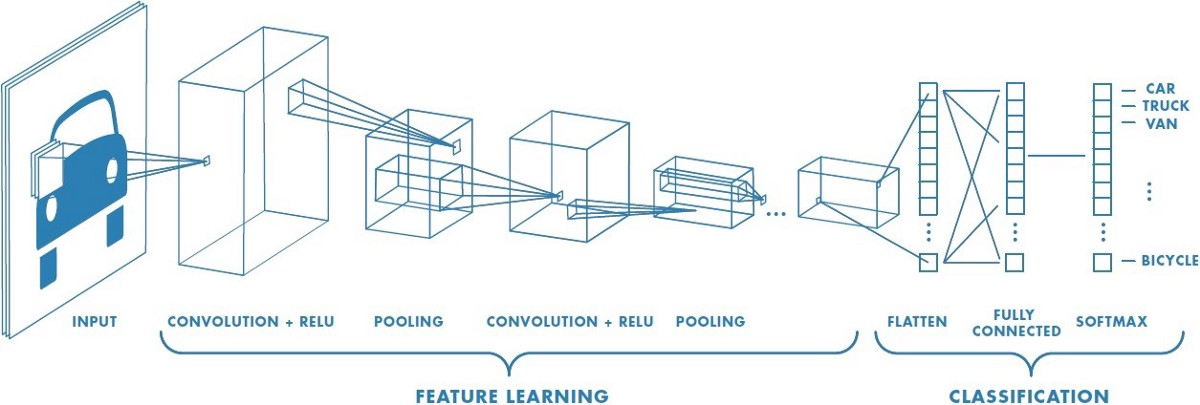

Reference for the image: https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53

## Import relevant libraries

In [1]:
# Data manipulation
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

# Deep learning 
import tensorflow as tf
from tensorflow import keras
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from keras.callbacks import ReduceLROnPlateau

## Data reading

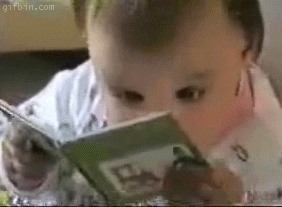

The data for this task is divided into training and testing data

In [2]:
# Items in train data
os.listdir('Lung infection dataset/train')

['.ipynb_checkpoints', 'healthy', 'Type 1 disease', 'Type 2 disease']

In [3]:
# Items in test data
os.listdir('Lung infection dataset/test')

['.ipynb_checkpoints', 'healthy', 'Type 1 disease', 'Type 2 disease']

## Data visualisation

In [4]:
train_dir = 'Lung infection dataset/train'
test_dir = 'Lung infection dataset/test'

print('Train set:\n============================')
train_type_1_disease = len(os.listdir(os.path.join(train_dir, 'Type 1 disease')))
train_type_2_disease = len(os.listdir(os.path.join(train_dir, 'Type 2 disease')))
healthy_train = len(os.listdir(os.path.join(train_dir, 'healthy')))
print(f'Type 1 disease={train_type_1_disease}')
print(f'Type 2 disease={train_type_2_disease}')
print(f'Healthy={healthy_train}')

print('\nTest set:\n============================')
test_type_1_disease = len(os.listdir(os.path.join(test_dir, 'Type 1 disease')))
test_type_2_disease = len(os.listdir(os.path.join(test_dir, 'Type 2 disease')))
healthy_test = len(os.listdir(os.path.join(test_dir, 'healthy')))
print(f'test_type_1_disease={test_type_1_disease}')
print(f'test_type_2_disease={test_type_2_disease}')
print(f'Healthy={healthy_test}')

Train set:
Type 1 disease=111
Type 2 disease=70
Healthy=70

Test set:
test_type_1_disease=26
test_type_2_disease=20
Healthy=20


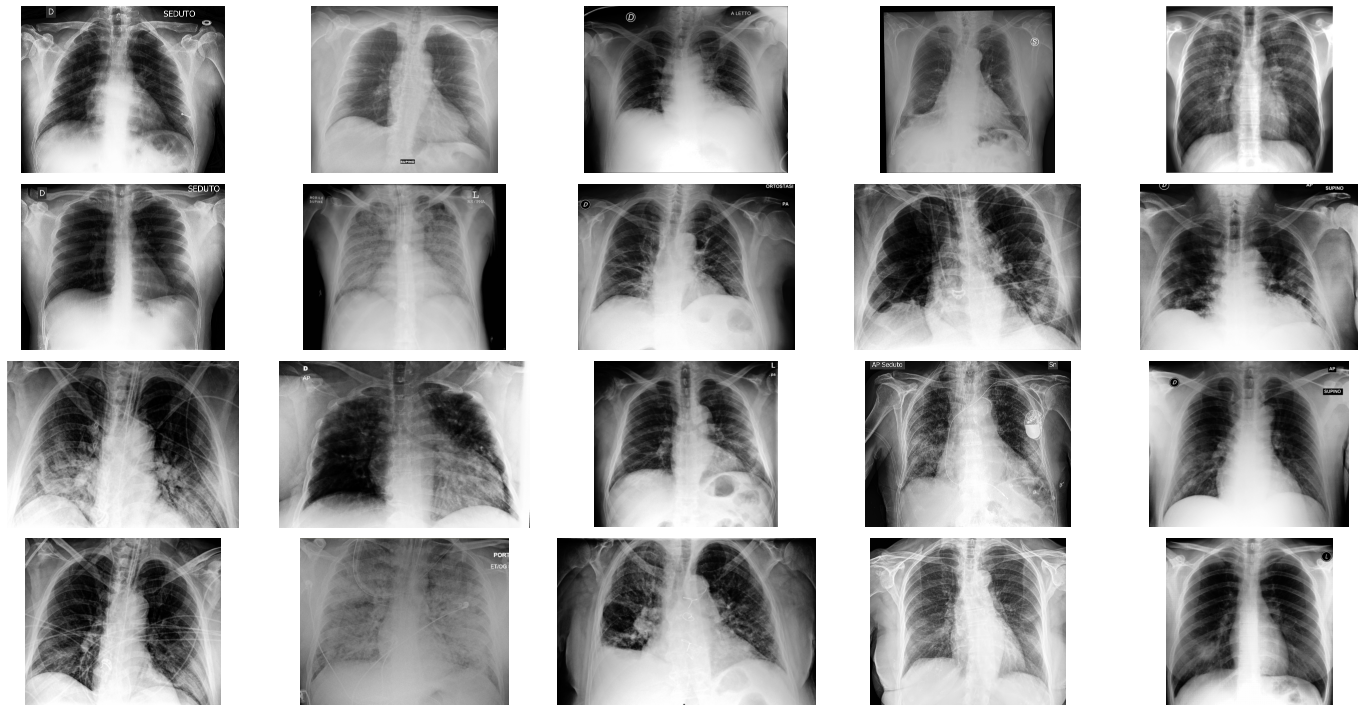

In [5]:
# Showing images for 'Type 1 disease'
train_type_1_disease = os.listdir('Lung infection dataset/train/Type 1 disease')
train_type_1_disease_dir = ('Lung infection dataset/train/Type 1 disease')

plt.figure(figsize=(20, 10))

for i in range(20):
    plt.subplot(4, 5, i + 1)
    img =  plt.imread(os.path.join(train_type_1_disease_dir, train_type_1_disease[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
plt.tight_layout()

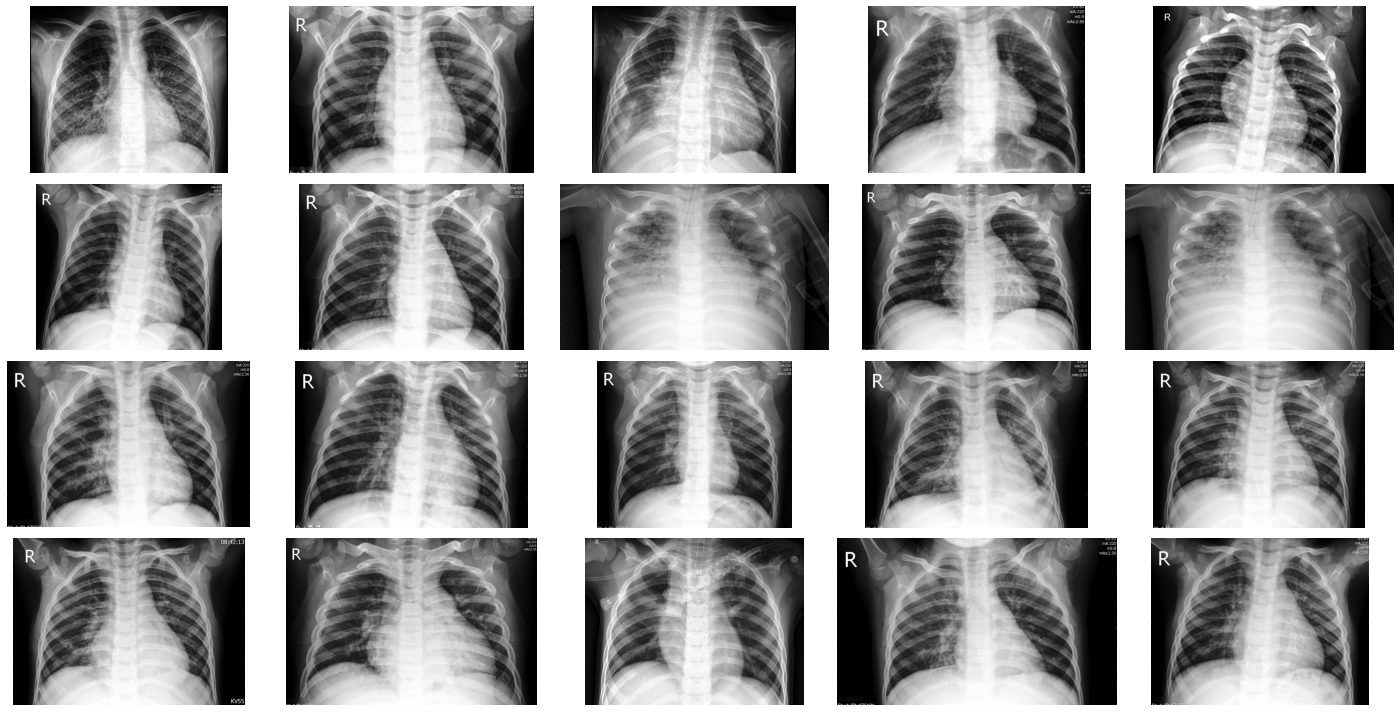

In [6]:
# Showing images for 'Type 2 disease'
train_type_2_disease = os.listdir('Lung infection dataset/train/Type 2 disease')
train_type_2_disease_dir = 'Lung infection dataset/train/Type 2 disease'

plt.figure(figsize=(20, 10))

for i in range(20):
    plt.subplot(4, 5, i + 1)
    img =  plt.imread(os.path.join(train_type_2_disease_dir, train_type_2_disease[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
plt.tight_layout()

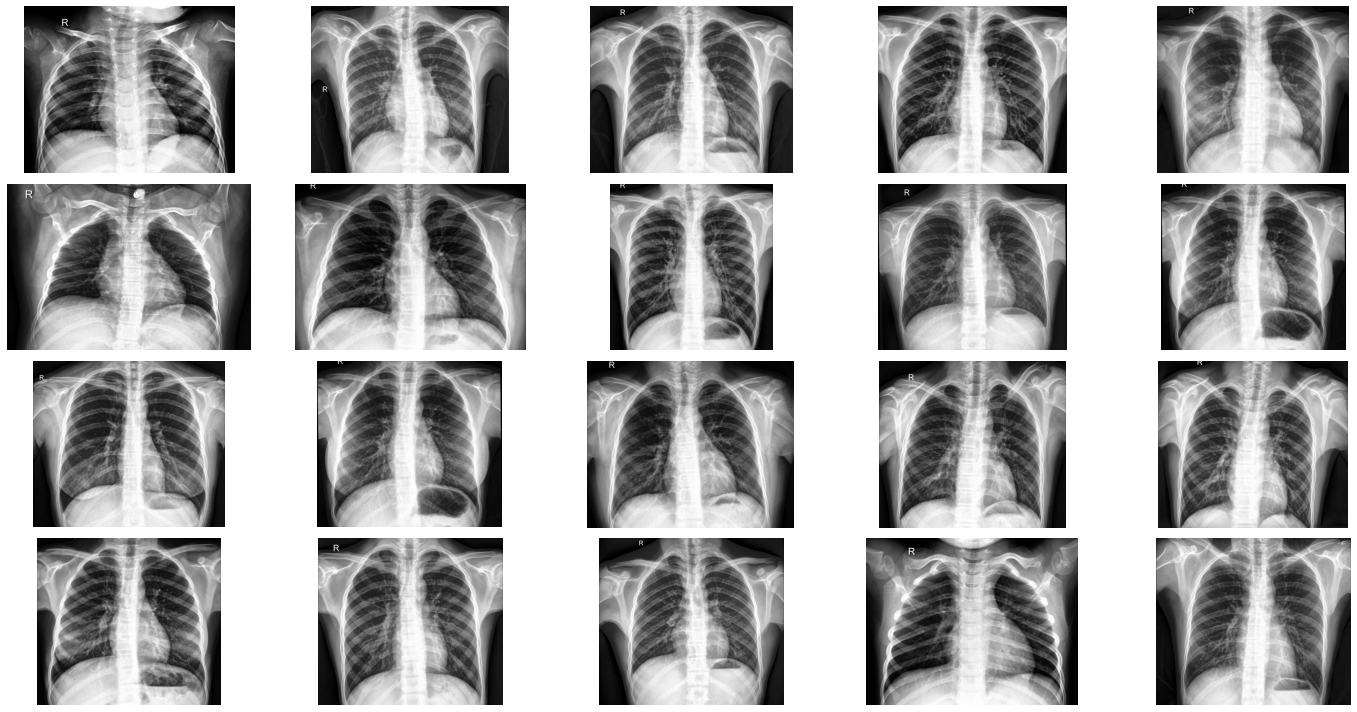

In [7]:
# Showing images for 'healthy lungs'
train_healthy = os.listdir('Lung infection dataset/train/healthy')[1:70]
train_healthy_dir = 'Lung infection dataset/train/healthy'

plt.figure(figsize=(20, 10))

for i in range(20):
    plt.subplot(4, 5, i + 1)
    img =  plt.imread(os.path.join(train_healthy_dir, train_healthy[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
plt.tight_layout()

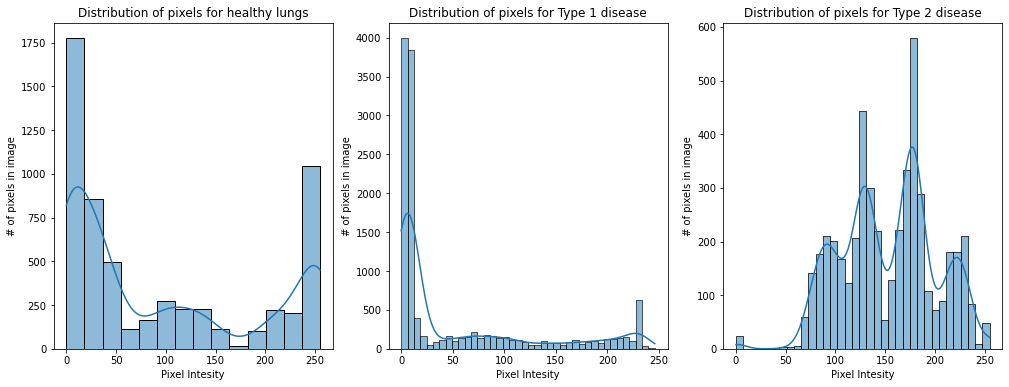

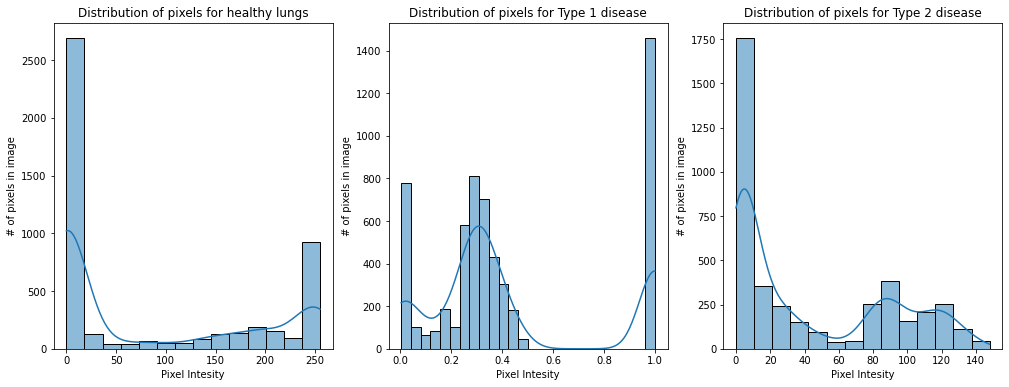

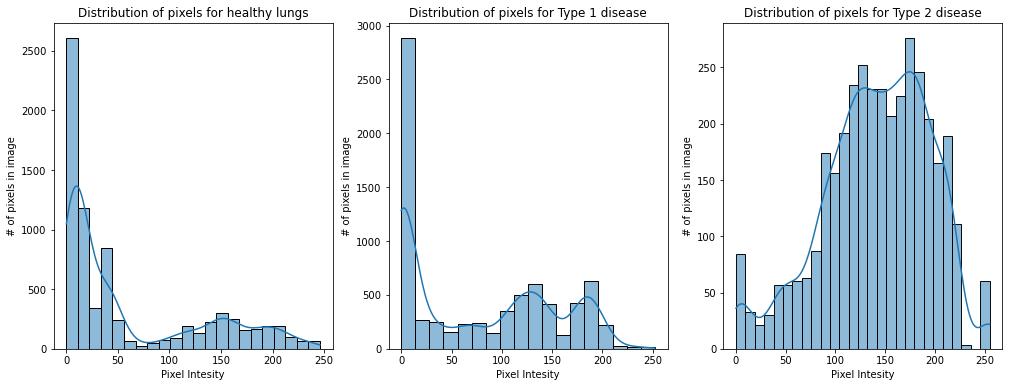

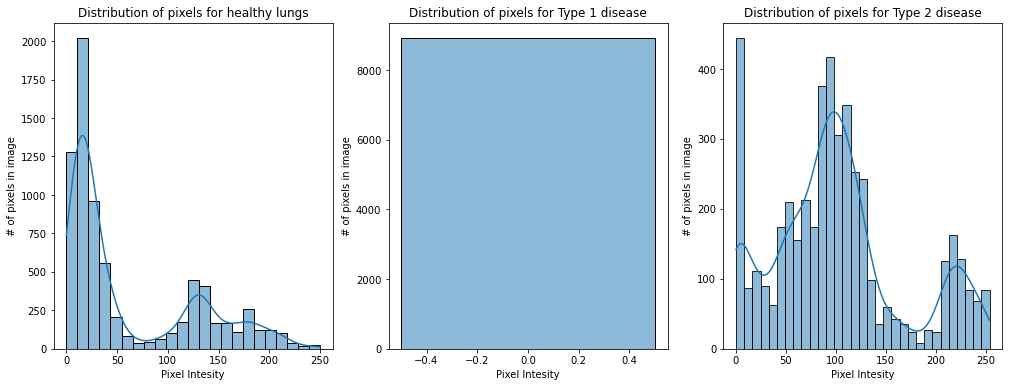

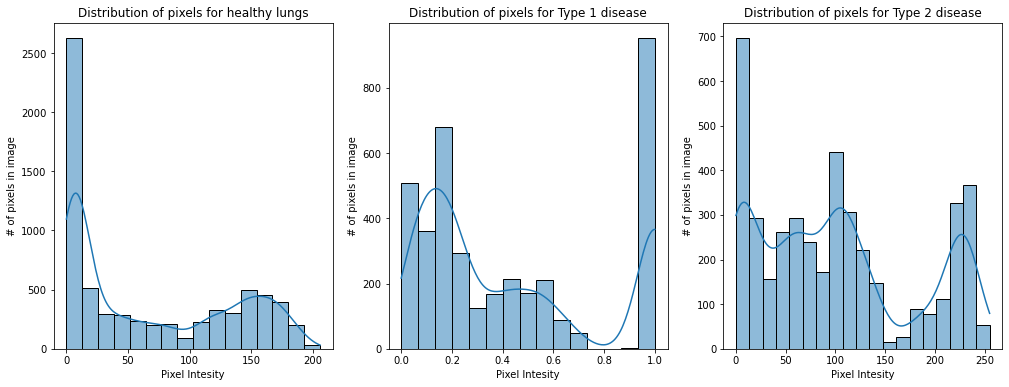

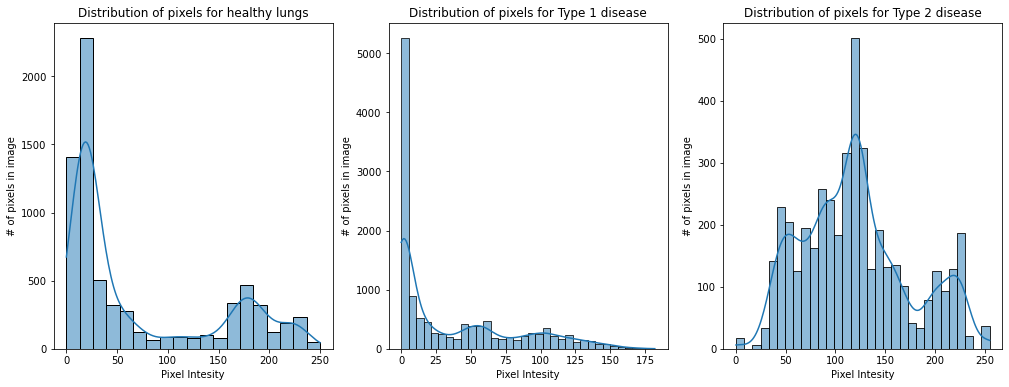

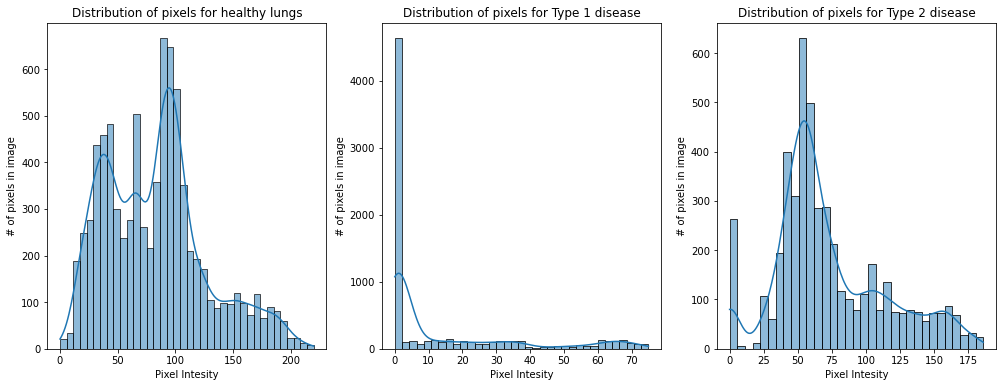

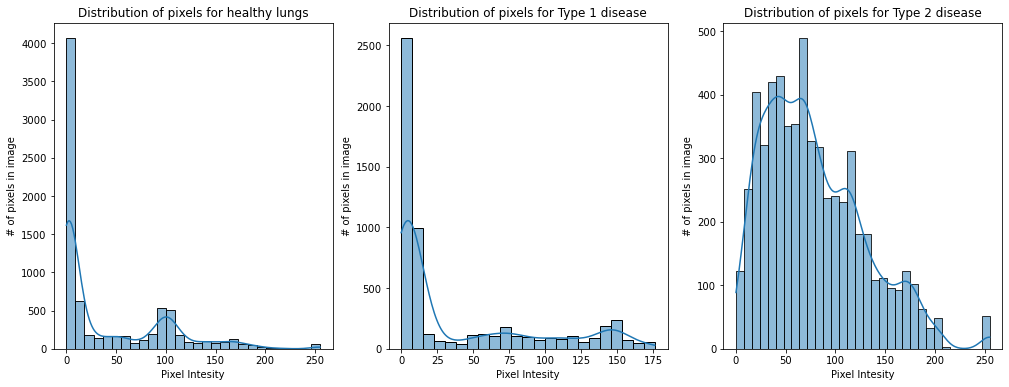

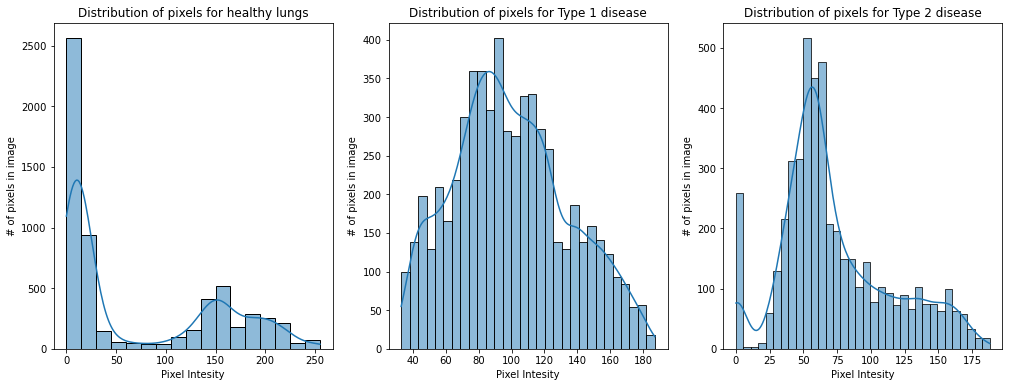

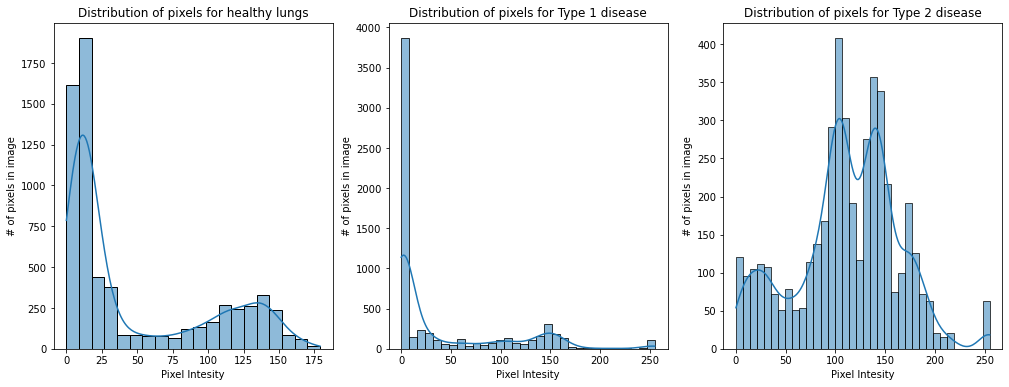

<Figure size 432x288 with 0 Axes>

In [8]:
# Showing pixel distribution for healthy lungs and unhealthy lungs (Type 1 and 2 diseases)
for i in range(10):
    
 
    # Obtaining images for healthy lungs
    normal_img = os.listdir('Lung infection dataset/train/healthy')
    normal_dir = 'Lung infection dataset/train/healthy'
    healthy_img = plt.imread(os.path.join(normal_dir, normal_img[i]))
    
    # Obtaining images for unhealthy lungs (Type 1 disease)
    unhealthy1__img = os.listdir('Lung infection dataset/train/Type 1 disease')
    unhealthy1_dir = 'Lung infection dataset/train/Type 1 disease'
    unhealthy_img_1 = plt.imread(os.path.join(unhealthy1_dir, unhealthy1__img[i]))
    
    # Obtaining images for unhealthy lungs (Type 2 disease)
    unhealthy2__img = os.listdir('Lung infection dataset/train/Type 2 disease')[1:70]
    unhealthy2_dir = 'Lung infection dataset/train/Type 2 disease'
    unhealthy_img_2 = plt.imread(os.path.join(unhealthy2_dir, unhealthy2__img[i]))
    
    fig = plt.figure(figsize = (17, 6))
    
    plt.subplot(1,3,1)
    sns.histplot(healthy_img[i].ravel(), label = f'Pixel Mean {np.mean(healthy_img[i]):.4f} & std {np.std(healthy_img[i]):.4f}', kde=True)
    plt.title('Distribution of pixels for healthy lungs')
    plt.xlabel('Pixel Intesity')
    plt.ylabel('# of pixels in image')
    
    plt.subplot(1,3,2)
    sns.histplot(unhealthy_img_1[i].ravel(), label = f'Pixel Mean {np.mean(unhealthy_img_1[i]):.4f} & std {np.std(unhealthy_img_1[i]):.4f}', kde=True)
    plt.title('Distribution of pixels for Type 1 disease')
    plt.xlabel('Pixel Intesity')
    plt.ylabel('# of pixels in image')
    
    plt.subplot(1,3,3)
    sns.histplot(unhealthy_img_2[i].ravel(), label = f'Pixel Mean {np.mean(unhealthy_img_2[i]):.4f} & std {np.std(unhealthy_img_2[i]):.4f}', kde=True)
    plt.title('Distribution of pixels for Type 2 disease')
    plt.xlabel('Pixel Intesity')
    plt.ylabel('# of pixels in image')
    plt.show()
plt.tight_layout()

## Image Processing


***Augmentation***

In [9]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 0.1,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.1
)

train = train_datagen.flow_from_directory(
    train_dir,
    target_size = (48, 48),
    color_mode = 'rgb',
    shuffle = True,
    batch_size=32
    
)

Found 251 images belonging to 4 classes.


In [10]:
test_datagen = ImageDataGenerator(
    rescale = 1./255,
)

test = test_datagen.flow_from_directory(
    test_dir,
    target_size = (48, 48),
    color_mode = 'rgb',
    shuffle = True,
    batch_size=32
)

Found 66 images belonging to 4 classes.


## Model Training

***Building a CNN model***

In [11]:
# Class weights

weight_for_0 = len(train_type_1_disease) / (healthy_train + len(train_type_1_disease))
weight_for_1 = healthy_train / (healthy_train + len(train_type_1_disease))

class_weight = {0: weight_for_0, 1: weight_for_1}

print(f"Weight for class 0: {weight_for_0:.2f}")
print(f"Weight for class 1: {weight_for_1:.2f}")

# Early stopping
from keras.callbacks import  EarlyStopping
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

Weight for class 0: 0.61
Weight for class 1: 0.39


In [12]:
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD

model = Sequential()
# Padding = 'same'  results in padding the input such that
# the output has the same length as the original input
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(48, 48, 3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(4))
model.add(Activation('softmax'))

# Let's create our model
model.compile(loss = 'categorical_crossentropy',
              optimizer = SGD(0.01),
              metrics = ['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 activation (Activation)     (None, 48, 48, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 46, 46, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 23, 23, 32)        0         
                                                        

### Fitting the model

In [13]:
history = model.fit(train,
          batch_size=10,
          epochs=10,
          validation_data=(test),
          callbacks = [callback],
          shuffle=True,
          verbose=1)

Epoch 1/10
8/8 [==============================] - 13s 1s/step - loss: 1.2721 - accuracy: 0.3904 - val_loss: 1.1982 - val_accuracy: 0.3939
Epoch 2/10
8/8 [==============================] - 11s 1s/step - loss: 1.1571 - accuracy: 0.4104 - val_loss: 1.0987 - val_accuracy: 0.3939
Epoch 3/10
8/8 [==============================] - 11s 1s/step - loss: 1.0956 - accuracy: 0.4622 - val_loss: 1.0469 - val_accuracy: 0.3939
Epoch 4/10
8/8 [==============================] - 11s 1s/step - loss: 1.0573 - accuracy: 0.4542 - val_loss: 0.9965 - val_accuracy: 0.4394
Epoch 5/10
8/8 [==============================] - 11s 1s/step - loss: 1.0037 - accuracy: 0.5458 - val_loss: 0.9232 - val_accuracy: 0.6212
Epoch 6/10
8/8 [==============================] - 11s 1s/step - loss: 0.9311 - accuracy: 0.5936 - val_loss: 0.8413 - val_accuracy: 0.5303
Epoch 7/10
8/8 [==============================] - 11s 1s/step - loss: 0.9760 - accuracy: 0.5578 - val_loss: 0.8569 - val_accuracy: 0.5152
Epoch 8/10
8/8 [==================

Text(0.5, 1.0, 'Accuracy Evolution')

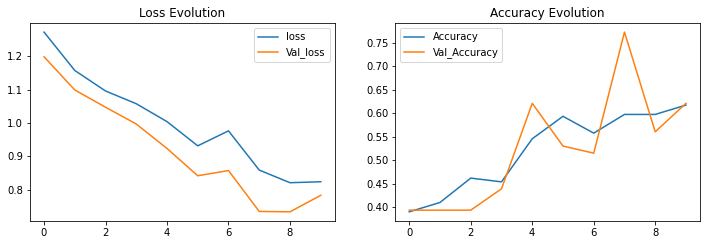

In [14]:
# Checking the loss evolutiong and accuracy evolution
plt.figure(figsize = (12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'Val_loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label = 'Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [15]:
# Evaluate the perfomance of our trained model
scores_cnn = model.evaluate(test, verbose = 1)
print('Test loss:', scores_cnn[0])
print('Test accuracy:', scores_cnn[1])

3/3 [==============================] - 1s 307ms/step - loss: 0.7826 - accuracy: 0.6212
Test loss: 0.7826271057128906
Test accuracy: 0.6212121248245239


## Transfer learning (mobilenet)

Mobilenet is a lightweight neural network architecture designed for mobile devices. It is efficient in terms of computation and memory resources, making it well-suited for transfer learning.

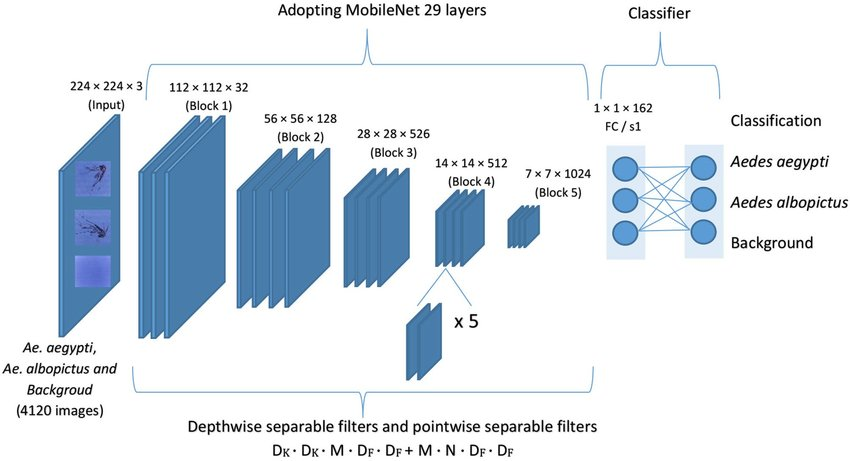

Reference: https://www.researchgate.net/figure/The-workflow-of-MobileNet-DCNN-architectures-and-transfer-learning-model-of-the-present_fig3_351456151

In [16]:
from keras.applications.mobilenet import MobileNet
from keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten, BatchNormalization
from keras.models import Sequential
base_model = tf.keras.applications.MobileNetV2(input_shape = (48, 48, 3), include_top = False, weights = 'imagenet')

In [17]:
base_model.trainable = False

In [18]:
#model = tf.keras.Sequential([
    #base_model,
    #tf.keras.layers.Conv2D(128, 3, activation = 'relu'),
    #tf.keras.layers.Dropout(0.2),
    #tf.keras.layers.GlobalAveragePooling2D(),
    #tf.keras.layers.Dense(6, activation = 'softmax')
#])
from keras.layers import Conv2D,MaxPool2D,GlobalAveragePooling2D,AveragePooling2D

x=base_model.output
x=GlobalAveragePooling2D()(x)

x=Dense(130,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(105,activation='relu')(x) #dense layer 2
x=Dense(10,activation='relu')(x) #dense layer 3

preds=Dense(4,activation='softmax')(x) #final layer with softmax activation


In [19]:
from keras.models import Model
model=Model(inputs=base_model.input, outputs=preds)
for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

In [20]:
from keras.optimizers import Adam
from keras.callbacks import  EarlyStopping
Adam=keras.optimizers.Adam(learning_rate = 0.0001, beta_1 = 0.9, beta_2 = 0.999, 
                           epsilon = None, decay = 1e-5, amsgrad=False)
es = EarlyStopping(patience=5)
Adam

In [21]:
model.compile(optimizer=Adam, loss='categorical_crossentropy', metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 Conv1 (Conv2D)                 (None, 24, 24, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 24, 24, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 24, 24, 32)   0           ['bn_Conv1[0][0]']               
                                                                                              

In [22]:
history= model.fit_generator(generator = (train), 
                            steps_per_epoch = 5,
                            validation_data = test, 
                            validation_steps = 5,
                            callbacks = [es],
                            epochs = 5)

C:\Users\johns\AppData\Local\Temp\ipykernel_36152\1861770809.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history= model.fit_generator(generator = (train),


Epoch 1/5
5/5 [==============================] - 17s 2s/step - loss: 1.7405 - accuracy: 0.1250 - val_loss: 1.5359 - val_accuracy: 0.1061
Epoch 2/5
5/5 [==============================] - 6s 1s/step - loss: 1.5062 - accuracy: 0.2387
Epoch 3/5
5/5 [==============================] - 6s 1s/step - loss: 1.3032 - accuracy: 0.3812
Epoch 4/5
5/5 [==============================] - 6s 1s/step - loss: 1.2003 - accuracy: 0.4968
Epoch 5/5
5/5 [==============================] - 6s 1s/step - loss: 1.1763 - accuracy: 0.4437


Text(0.5, 1.0, 'Accuracy Evolution')

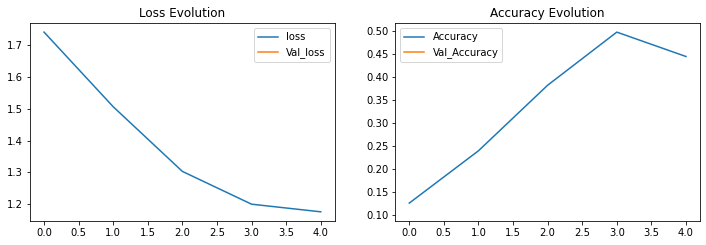

In [23]:
# Checking the loss evolutiong and accuracy evolution
plt.figure(figsize = (12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'Val_loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label = 'Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [24]:
# Evaluate the perfomance of our trained model
scores_mobnet = model.evaluate(test, verbose = 1)
print('Test loss:', scores_mobnet[0])
print('Test accuracy:', scores_mobnet[1])

3/3 [==============================] - 1s 359ms/step - loss: 1.3054 - accuracy: 0.3939
Test loss: 1.3053652048110962
Test accuracy: 0.39393940567970276


## Transfer learning (DenseNet)

Densenet is a convolutional network where each layer is connected to all other layers that are deeper in the network:
- The first layer is connected to the 2nd, 3rd, 4th etc
- The second layer is connected to the 3rd, 4th, 5th etc

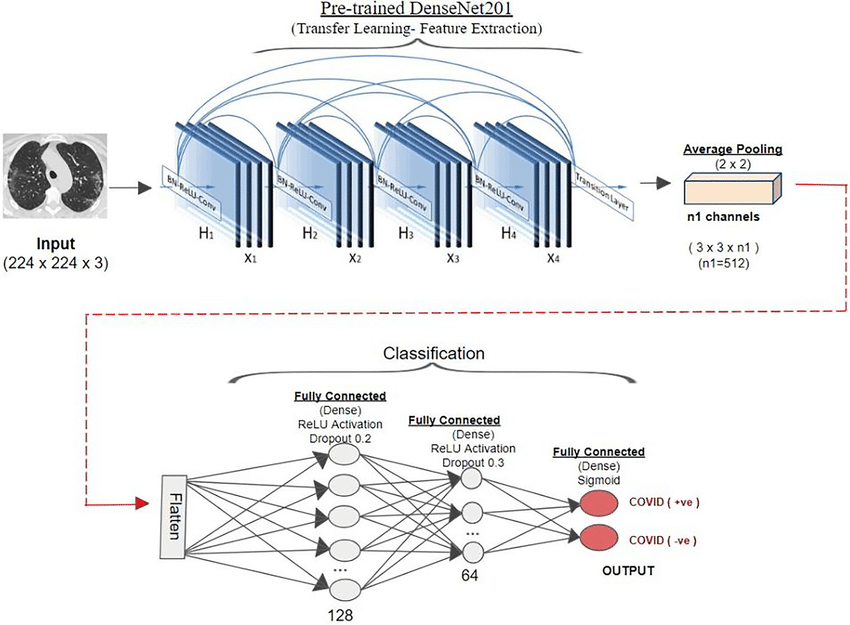

Reference: https://www.researchgate.net/figure/Architecture-of-proposed-transferred-DenseNet201-for-feature-extraction-with-CNN-for_fig1_342672764

In [25]:
from keras.applications.densenet import DenseNet121
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras import backend as K

base_model = DenseNet121(input_shape=(48, 48, 3), include_top = False, weights = 'imagenet', pooling = 'avg')

base_model.summary()

Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 54, 54, 3)   0           ['input_2[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 24, 24, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 24, 24, 64)   256         ['conv1/conv[0][0]']             
                                                                                        

In [26]:
layers = base_model.layers
print(f'The model has {len(layers)} layers')

The model has 428 layers


In [27]:
print(f'The input shape {base_model.input}')
print(f'The output shape {base_model.output}')

The input shape KerasTensor(type_spec=TensorSpec(shape=(None, 48, 48, 3), dtype=tf.float32, name='input_2'), name='input_2', description="created by layer 'input_2'")
The output shape KerasTensor(type_spec=TensorSpec(shape=(None, 1024), dtype=tf.float32, name=None), name='avg_pool/Mean:0', description="created by layer 'avg_pool'")


In [28]:
base_model = DenseNet121(include_top = False, weights = 'imagenet')
x = base_model.output

x = GlobalAveragePooling2D()(x)

predictions = Dense(4, activation = 'softmax')(x)

model = Model(inputs = base_model.input, outputs = predictions)

model.compile(loss = 'binary_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [29]:
history = model.fit(train,
          batch_size=10,
          epochs=15,
          validation_data=(test),
          callbacks = [callback],
          shuffle=True,
          verbose=1)

Epoch 1/15
8/8 [==============================] - 32s 2s/step - loss: 0.5117 - accuracy: 0.6096 - val_loss: 0.6617 - val_accuracy: 0.3636
Epoch 2/15
8/8 [==============================] - 14s 2s/step - loss: 0.2298 - accuracy: 0.8526 - val_loss: 1.4275 - val_accuracy: 0.3182
Epoch 3/15
8/8 [==============================] - 14s 2s/step - loss: 0.1705 - accuracy: 0.8765 - val_loss: 2.6966 - val_accuracy: 0.3333
Epoch 4/15
8/8 [==============================] - 14s 2s/step - loss: 0.1335 - accuracy: 0.8884 - val_loss: 2.8586 - val_accuracy: 0.3485
Epoch 5/15
8/8 [==============================] - 15s 2s/step - loss: 0.1358 - accuracy: 0.9243 - val_loss: 2.3455 - val_accuracy: 0.3939
Epoch 6/15
8/8 [==============================] - 14s 2s/step - loss: 0.0847 - accuracy: 0.9363 - val_loss: 2.8418 - val_accuracy: 0.6364
Epoch 7/15
8/8 [==============================] - 14s 2s/step - loss: 0.0569 - accuracy: 0.9721 - val_loss: 0.5830 - val_accuracy: 0.7879
Epoch 8/15
8/8 [==================

Text(0.5, 1.0, 'Accuracy Evolution')

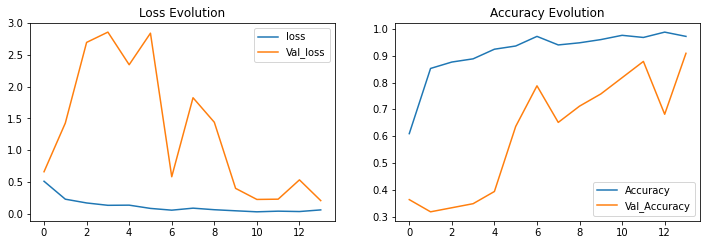

In [30]:
# Checking the loss evolutiong and accuracy evolution
plt.figure(figsize = (12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'Val_loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label = 'Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [31]:
scores_Dnet = model.evaluate(test, verbose = 1)
print('Test loss:', scores_Dnet[0])
print('Test accuracy:', scores_Dnet[1])

3/3 [==============================] - 1s 365ms/step - loss: 0.2074 - accuracy: 0.9091
Test loss: 0.2073708474636078
Test accuracy: 0.9090909361839294


## Comparison of accuracies

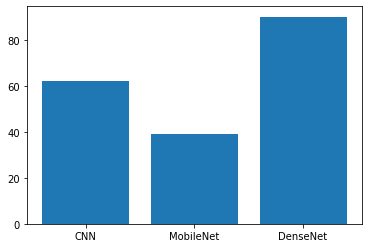

In [33]:
test_accuracies = [int(scores_cnn[1]*100), int(scores_mobnet[1]*100), int(scores_Dnet[1]*100)]
my_list = ('CNN', 'MobileNet', 'DenseNet')
y_pos = np.arange(len(my_list))

# Create bars
plt.bar(y_pos, test_accuracies)

# Create names on the x-axis
plt.xticks(y_pos, my_list)

# Show graphic
plt.show()


It can be seen that DenseNet has the highest test accuracy than CNN, and MobileNet. Therefore, in this case, it can be used as the prefered model for lung infection diagnisis.